In [171]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [172]:
# Load file
df_rent = pd.read_csv('./datasets/rent_dataset.csv')

In [173]:
# Check file
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  100 non-null    int64  
 1   size_m2             100 non-null    float64
 2   n_rooms             100 non-null    int64  
 3   home_age            100 non-null    float64
 4   garage              100 non-null    int64  
 5   location_periphery  100 non-null    bool   
 6   location_suburb     100 non-null    bool   
 7   rent_value          100 non-null    float64
dtypes: bool(2), float64(3), int64(3)
memory usage: 5.0 KB


In [174]:
# Remove Id column
df_rent.drop(columns=['id'], axis=1, inplace=True)

In [175]:
# Copy DF to EDA DF
df_rent_eda = df_rent.copy()

In [176]:
# Copy DF to Bucketing DF
df_rent_bucketing = df_rent.copy()

### EDA

In [177]:
# Visualize Data
df_rent_eda.head(10)

,size_m2,n_rooms,home_age,garage,location_periphery,location_suburb,rent_value
0,106.181018,1,36.760806,0,True,False,1767.122088
1,192.607146,4,10.453581,1,True,False,3278.742397
2,159.799091,5,27.072399,1,True,False,2953.899737
3,139.798773,4,34.789220,1,False,True,2514.717108
4,73.402796,5,11.427501,0,False,True,1942.164396
5,73.399178,5,8.747746,1,True,False,2141.303241
6,58.712542,3,49.108417,1,True,False,1625.680981
7,179.926422,5,25.831795,0,False,True,2854.591908
8,140.167252,4,13.041459,1,True,False,2702.673542
9,156.210887,5,49.812685,1,False,False,2456.538289


In [178]:
df_rent_eda.garage.unique()

array([0, 1])

In [179]:
df_rent_eda.isna().sum()

size_m2               0
n_rooms               0
home_age              0
garage                0
location_periphery    0
location_suburb       0
rent_value            0
dtype: int64

In [180]:
# Metrics
df_rent_eda.describe()

,size_m2,n_rooms,home_age,garage,rent_value
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,120.527112,2.910000,25.794810,0.520000,2112.819084
std,44.623412,1.400541,14.348628,0.502117,514.314100
min,50.828318,1.000000,0.259243,0.000000,1192.728727
25%,78.980114,1.750000,13.969405,0.000000,1694.633091
50%,119.621368,3.000000,24.827177,1.000000,2069.395680
75%,159.530468,4.000000,37.252879,1.000000,2520.182679
max,198.033040,5.000000,49.812685,1.000000,3278.742397


In [181]:
# Convert garage column from numeric (0/1) to categorical (No/Yes)
df_rent_eda['garage'] = df_rent_eda ['garage'].map({0: 'No', 1: 'Yes'})

In [182]:
# Convert size and home age to integer
df_rent_eda.size_m2 = df_rent_eda.size_m2.astype(int)
df_rent_eda.home_age = df_rent_eda.home_age.astype(int)

In [183]:
# Dataframe Structure
df_rent_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   size_m2             100 non-null    int64  
 1   n_rooms             100 non-null    int64  
 2   home_age            100 non-null    int64  
 3   garage              100 non-null    object 
 4   location_periphery  100 non-null    bool   
 5   location_suburb     100 non-null    bool   
 6   rent_value          100 non-null    float64
dtypes: bool(2), float64(1), int64(3), object(1)
memory usage: 4.2+ KB


In [184]:
# Visualize data
df_rent_eda.head(10)

,size_m2,n_rooms,home_age,garage,location_periphery,location_suburb,rent_value
0,106,1,36,No,True,False,1767.122088
1,192,4,10,Yes,True,False,3278.742397
2,159,5,27,Yes,True,False,2953.899737
3,139,4,34,Yes,False,True,2514.717108
4,73,5,11,No,False,True,1942.164396
5,73,5,8,Yes,True,False,2141.303241
6,58,3,49,Yes,True,False,1625.680981
7,179,5,25,No,False,True,2854.591908
8,140,4,13,Yes,True,False,2702.673542
9,156,5,49,Yes,False,False,2456.538289


<Axes: xlabel='size_m2'>

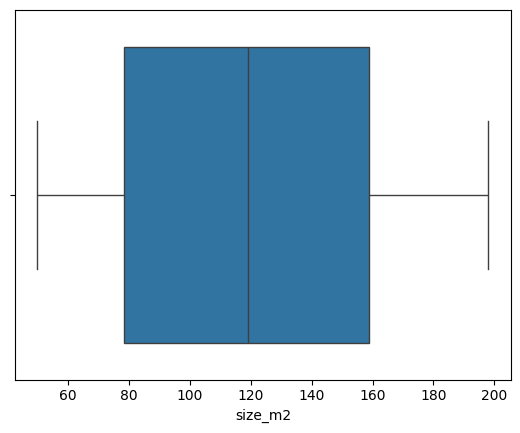

In [185]:
# Verify / detect size outliers
sns.boxplot(data=df_rent_eda, x='size_m2')

<Axes: xlabel='n_rooms'>

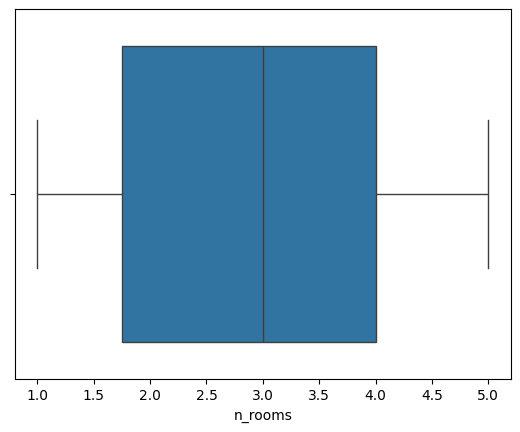

In [186]:
# Verify / detect number of rooms outliers
sns.boxplot(data=df_rent_eda, x='n_rooms')

<Axes: xlabel='home_age'>

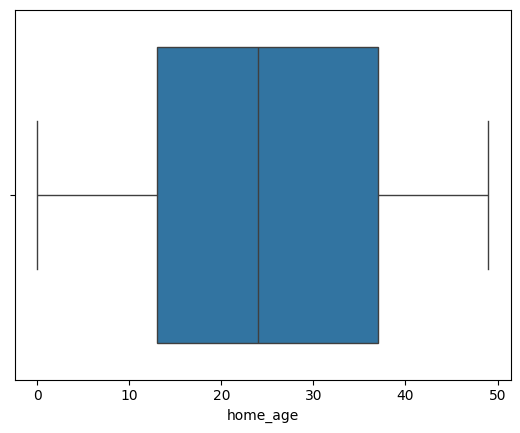

In [187]:
# Verify / detect hoem age outliers
sns.boxplot(data=df_rent_eda, x='home_age')

<Axes: xlabel='rent_value'>

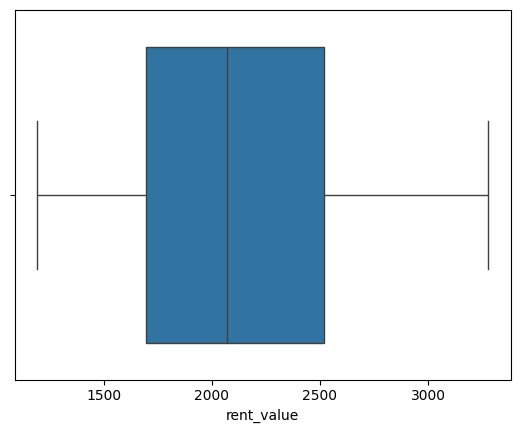

In [188]:
# Verify / detect rent value outliers
sns.boxplot(data=df_rent_eda, x='rent_value')

<Axes: xlabel='garage', ylabel='rent_value'>

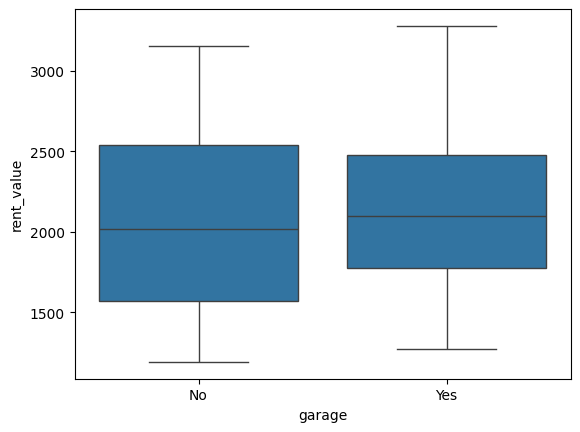

In [189]:
# Categorical variables (Garage) X Rent value
sns.boxplot(data=df_rent_eda, x='garage', y='rent_value')

<Axes: xlabel='location_periphery', ylabel='rent_value'>

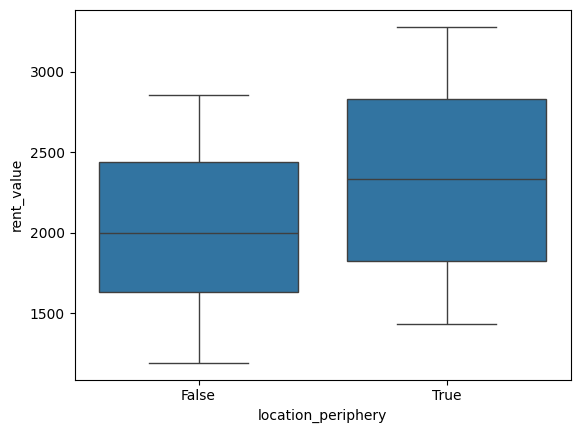

In [190]:
# Categorical variables (Location periphery) X Rent value
sns.boxplot(data=df_rent_eda, x='location_periphery', y='rent_value')

<Axes: xlabel='location_suburb', ylabel='rent_value'>

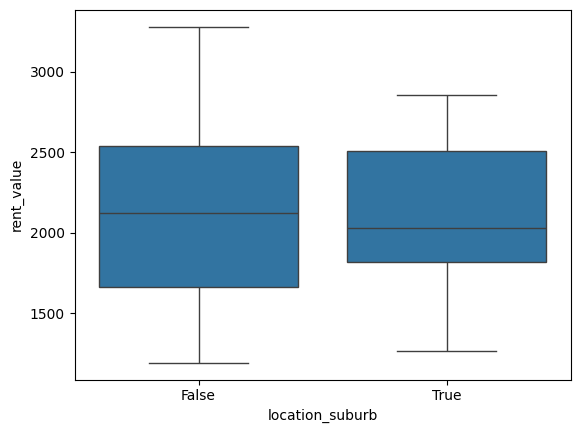

In [191]:
# Categorical variables (Location suburb) X Rent value
sns.boxplot(data=df_rent_eda, x='location_suburb', y='rent_value')

<Axes: xlabel='size_m2', ylabel='rent_value'>

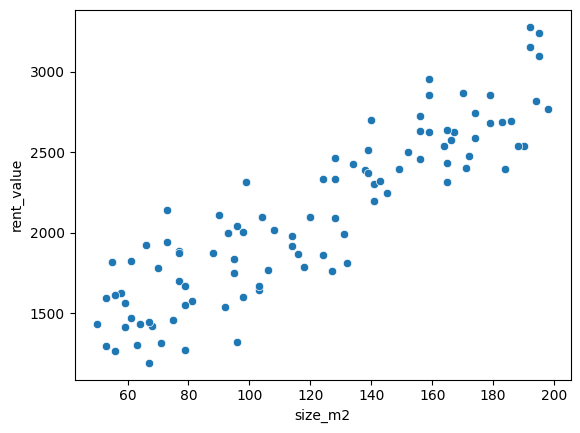

In [192]:
# Numeric variables (size) X Rent value
sns.scatterplot(data=df_rent_eda, x='size_m2', y='rent_value')

<Axes: xlabel='n_rooms', ylabel='rent_value'>

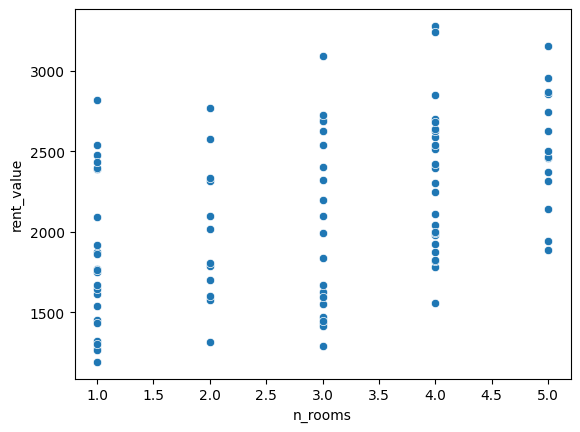

In [193]:
# Numeric variables (number of rooms) X Rent value
sns.scatterplot(data=df_rent_eda, x='n_rooms', y='rent_value')

<Axes: xlabel='home_age', ylabel='rent_value'>

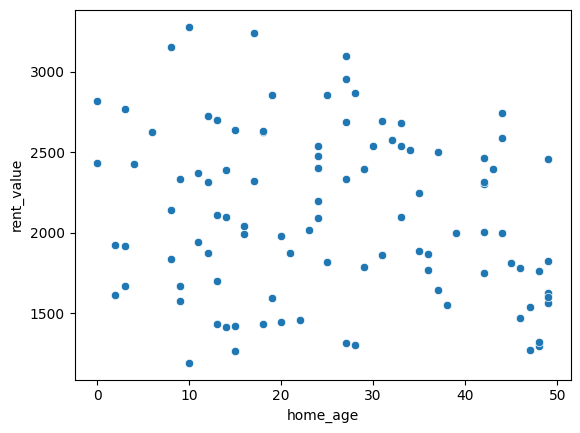

In [194]:
# Numeric variables (Home Age) X Rent value
sns.scatterplot(data=df_rent_eda, x='home_age', y='rent_value')

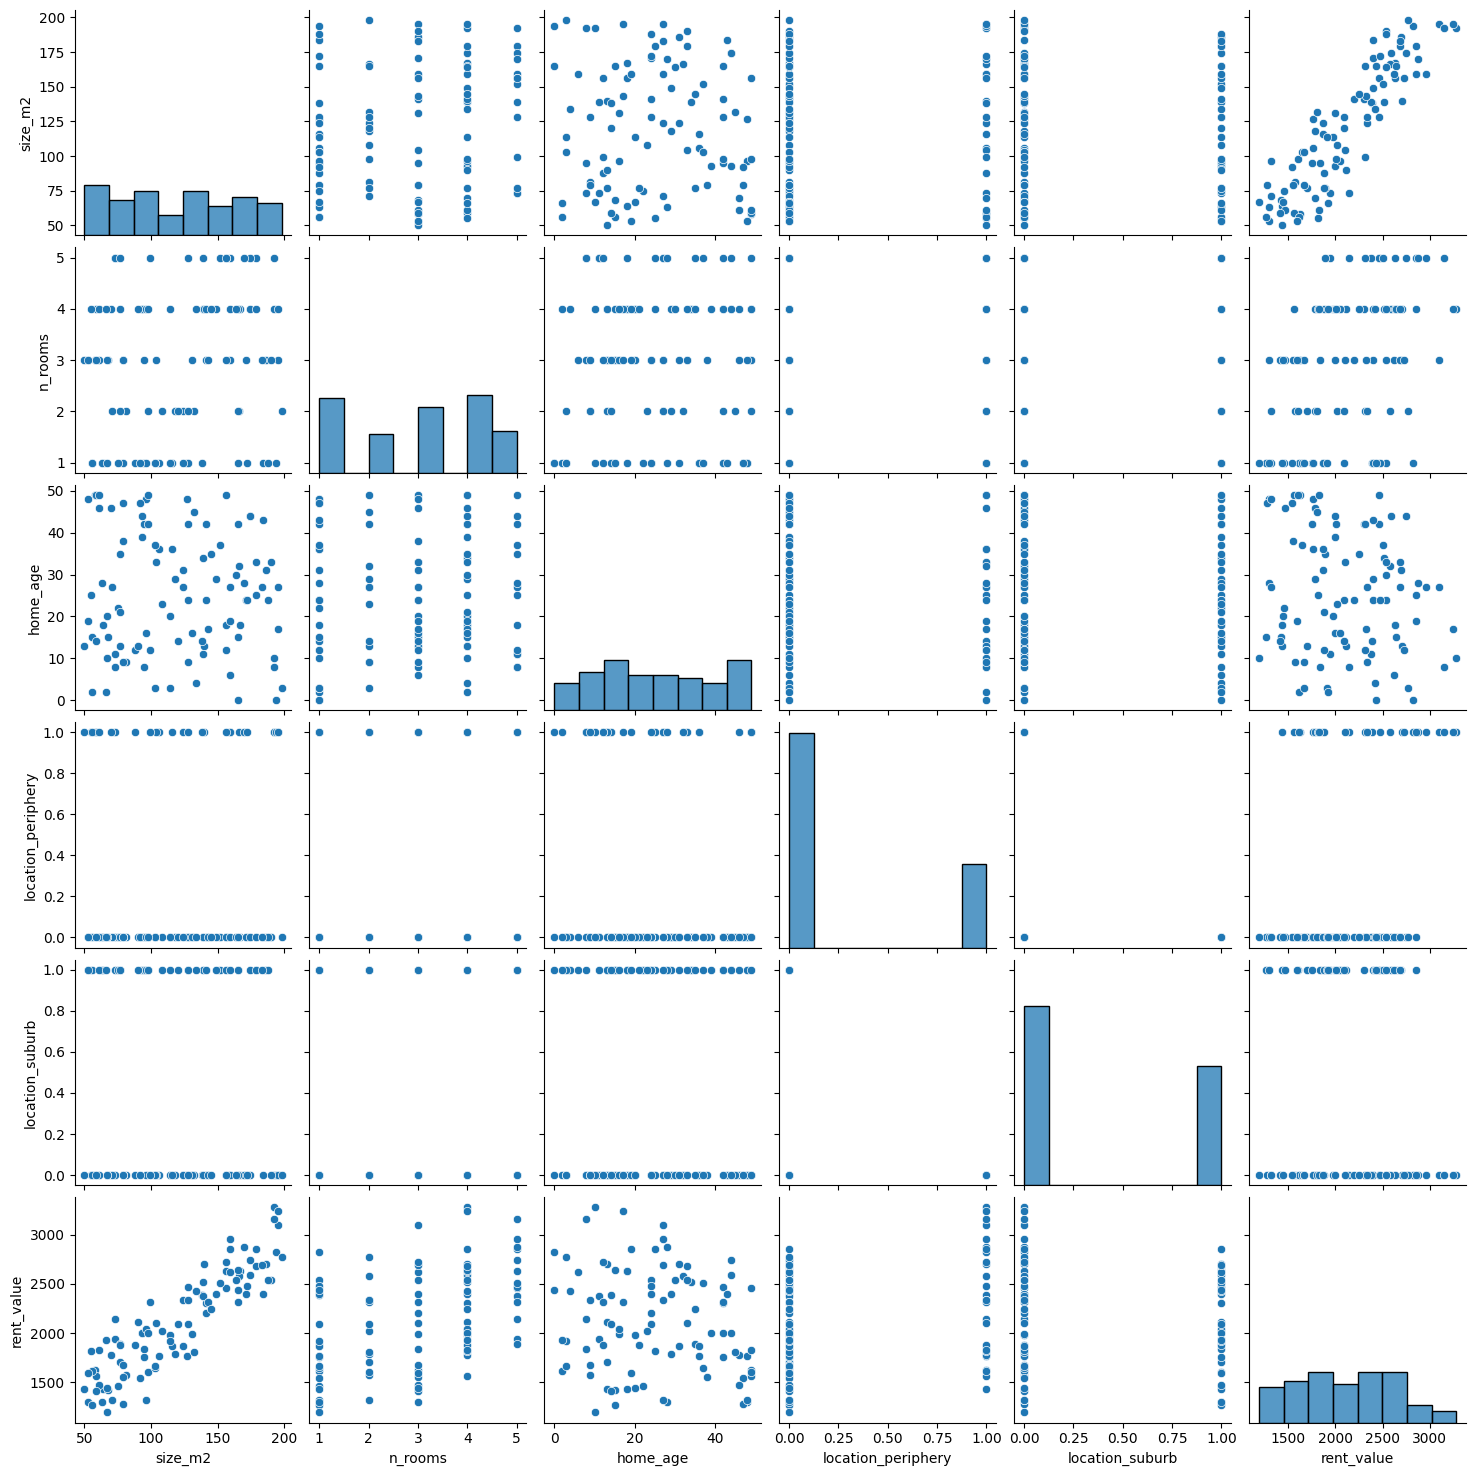

In [195]:
sns.pairplot(df_rent_eda)

In [196]:
if 'garage' in df_rent_eda.columns and df_rent_eda['garage'].nunique() <= 2:
    # If garage is already Yes/No, convert to 0/1
    if df_rent_eda['garage'].dtype == 'object':
        df_rent_eda['garage'] = df_rent_eda['garage'].map({'No': 0, 'Yes': 1})

In [197]:
# Convert nominal categorical variables to numerical, using One-Hot Encoder from Pandas
df_rent_eda = pd.get_dummies(df_rent_eda, columns=['location_suburb', 'location_periphery'], dtype='int64')

In [198]:
df_rent_eda.head(10)

,size_m2,n_rooms,home_age,garage,rent_value,location_suburb_False,location_suburb_True,location_periphery_False,location_periphery_True
0,106,1,36,0,1767.122088,1,0,0,1
1,192,4,10,1,3278.742397,1,0,0,1
2,159,5,27,1,2953.899737,1,0,0,1
3,139,4,34,1,2514.717108,0,1,1,0
4,73,5,11,0,1942.164396,0,1,1,0
5,73,5,8,1,2141.303241,1,0,0,1
6,58,3,49,1,1625.680981,1,0,0,1
7,179,5,25,0,2854.591908,0,1,1,0
8,140,4,13,1,2702.673542,1,0,0,1
9,156,5,49,1,2456.538289,1,0,1,0


<Axes: >

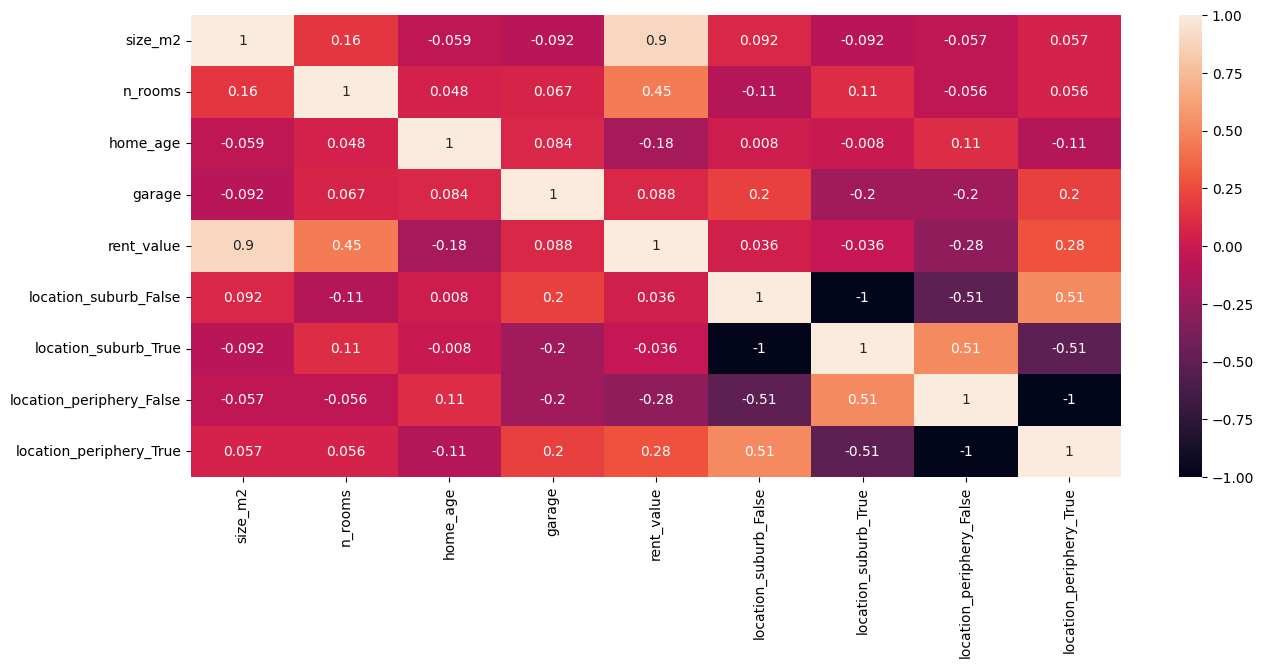

In [199]:
# Heatmap with Correlation between features
plt.figure(figsize=(15,6))
sns.heatmap(df_rent_eda.corr(), vmin=-1, vmax=1, annot=True)

<Axes: >

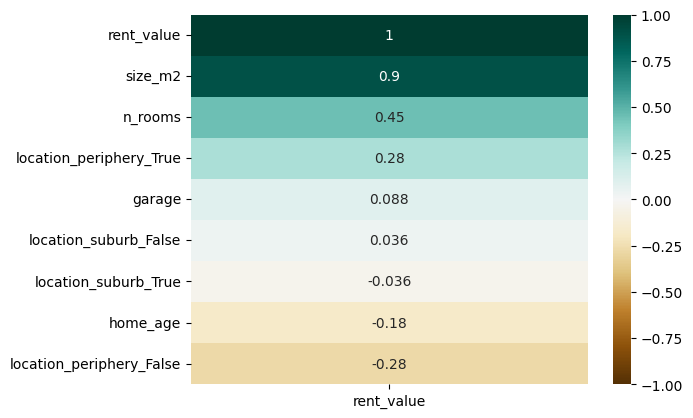

In [200]:
# Ranking format, just target correlation (rent_value)
sns.heatmap(df_rent_eda.corr()[['rent_value']].sort_values(by='rent_value', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [201]:
# Bucketing - Size
bins_size = [50, 75, 100, 125, 150, 175, 200]
labels_size = ['50 - 74', '75 - 99', '100 - 124', '125 - 149', '150 - 174', '175 - 199']
df_rent_bucketing['size_scale'] = pd.cut(x=df_rent_bucketing['size_m2'], bins=bins_size, labels=labels_size, include_lowest=True)

In [202]:
df_rent_bucketing.head(10)

,size_m2,n_rooms,home_age,garage,location_periphery,location_suburb,rent_value,size_scale
0,106.181018,1,36.760806,0,True,False,1767.122088,100 - 124
1,192.607146,4,10.453581,1,True,False,3278.742397,175 - 199
2,159.799091,5,27.072399,1,True,False,2953.899737,150 - 174
3,139.798773,4,34.789220,1,False,True,2514.717108,125 - 149
4,73.402796,5,11.427501,0,False,True,1942.164396,50 - 74
5,73.399178,5,8.747746,1,True,False,2141.303241,50 - 74
6,58.712542,3,49.108417,1,True,False,1625.680981,50 - 74
7,179.926422,5,25.831795,0,False,True,2854.591908,175 - 199
8,140.167252,4,13.041459,1,True,False,2702.673542,125 - 149
9,156.210887,5,49.812685,1,False,False,2456.538289,150 - 174


<Axes: xlabel='size_scale', ylabel='rent_value'>

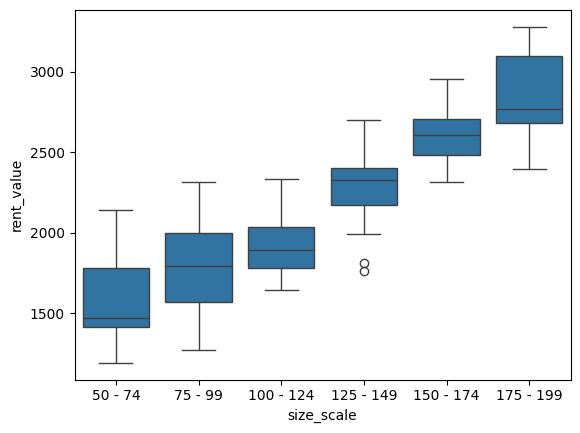

In [203]:
sns.boxplot(df_rent_bucketing, x='size_scale', y='rent_value')

In [204]:
# Bucketing - Home Age
bins_home_age = [0, 10, 20, 30, 40, 50]
labels_home_age = ['0 - 10', '10 - 20', '20 - 30', '30 - 40', '40 - 50']
df_rent_bucketing['home_age_scale'] = pd.cut(df_rent_bucketing['home_age'], bins=bins_home_age, labels=labels_home_age, include_lowest=True)

<Axes: xlabel='home_age_scale', ylabel='rent_value'>

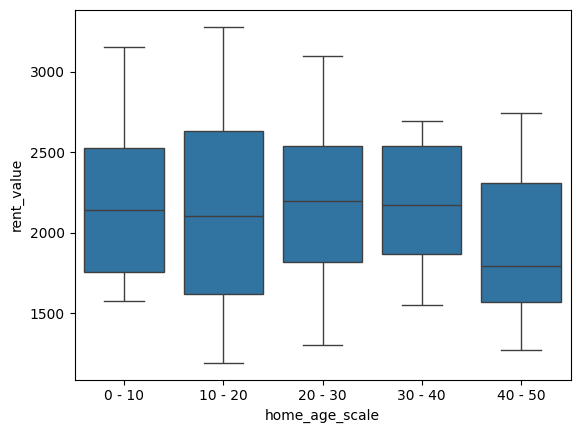

In [205]:
sns.boxplot(df_rent_bucketing, x='home_age_scale', y='rent_value')

### Training Model

In [206]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

In [207]:
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   size_m2             100 non-null    float64
 1   n_rooms             100 non-null    int64  
 2   home_age            100 non-null    float64
 3   garage              100 non-null    int64  
 4   location_periphery  100 non-null    bool   
 5   location_suburb     100 non-null    bool   
 6   rent_value          100 non-null    float64
dtypes: bool(2), float64(3), int64(2)
memory usage: 4.2 KB


In [208]:
X = df_rent.drop(columns='rent_value', axis=1)
y = df_rent['rent_value']

In [209]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [210]:
y_test.shape

(30,)

In [211]:
boolean_columns = ['location_periphery', 'location_suburb']
numeric_columns = ['size_m2', 'n_rooms', 'home_age', 'garage']

In [212]:
# Create preprocessing for different column types
def convert_to_int(x):
    return x.astype(int)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('bool', FunctionTransformer(convert_to_int), boolean_columns)
    ])

In [213]:
# Creating main Pipeline = preprocessing + training
model_regr = Pipeline(steps=[
  ('preprocess', preprocessor),
  ('regressor', LinearRegression())
])

In [214]:
# Train Model
model_regr.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['size_m2', 'n_rooms',
                                                   'home_age', 'garage']),
                                                 ('bool',
                                                  FunctionTransformer(func=<function convert_to_int at 0x30c5993a0>),
                                                  ['location_periphery',
                                                   'location_suburb'])])),
                ('regressor', LinearRegression())])

### Metrics Analysis

In [215]:
# Generate Prediction
y_pred = model_regr.predict(X_test)

In [216]:
# Calculate R2 Score
r2_score(y_test, y_pred)

0.9916999333653813

In [217]:
# Calculate MAE (Mean Absolute Error)
mean_absolute_error(y_test, y_pred)

40.155758399393285

In [218]:
# Calculate RMSE (Root Mean Square Error)
root_mean_squared_error(y_test, y_pred)

50.4560898238255

### Residuals Analysis

In [219]:
# Calculate residuals
residuals = y_test - y_pred

In [220]:
# Transform residuals into default scale
# (X - average) / std
from scipy.stats import zscore
residuals_std = zscore(residuals)

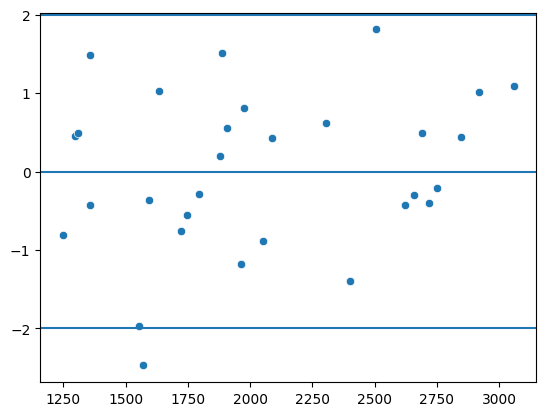

In [221]:
# If the residuals are balanced around -2 and 2, the model is linear

# Verify homogeneity of variance (homoscedasticity)
# If values are balance around the line, the model is homoscedastic
# if we have a tendency or pattern (forming a cone, funnel), the model is heteroscedastic
sns.scatterplot(x=y_pred, y=residuals_std)
plt.axhline(y=0)
plt.axhline(y=-2)
plt.axhline(y=2)

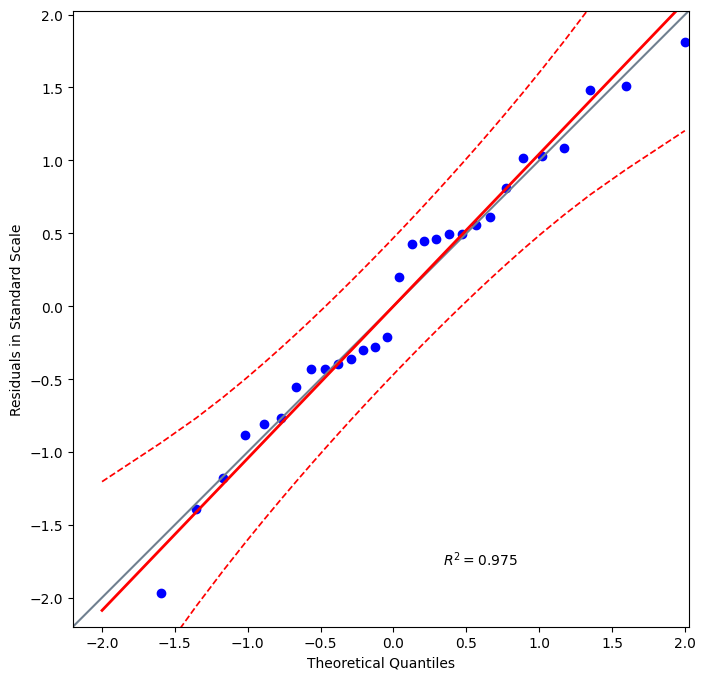

In [222]:
# Check if residuals follow a normal distribution
# QQ Plot
import pingouin as pg
plt.figure(figsize=(14,8))
pg.qqplot(residuals_std, dist='norm', confidence=0.95)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Residuals in Standard Scale')
plt.show()

In [223]:
# Shapiro-Wilk Normality Test
from scipy.stats import shapiro, kstest, anderson
from statsmodels.stats.diagnostic import lilliefors, het_goldfeldquandt
stat_shapiro, p_value_shapiro = shapiro(residuals)
print('Test Statistics: {} and P-Value: {}'.format(stat_shapiro, p_value_shapiro))

Test Statistics: 0.9747661268191615 and P-Value: 0.6758377246738067


In [224]:
# Kolmogorov-Smirnov Test
stat_ks, p_value_ks = kstest(residuals, 'norm')
print('Test Statistics: {} and P-Value: {}'.format(stat_ks, p_value_ks))

Test Statistics: 0.5333333329130063 and P-Value: 1.6935887714974056e-08


In [225]:
# Lilliefors Test
stat_ll, p_value_ll = lilliefors(residuals, dist='norm', pvalmethod='table')
print('Test Statistics: {} and P-Value: {}'.format(stat_ll, p_value_ll))

Test Statistics: 0.1280151836289024 and P-Value: 0.23503826081755505


In [226]:
# Anderson-Darling Test
stat_and, critical_and, significance_and = anderson(residuals, dist='norm')

In [227]:
critical_and

array([0.521, 0.593, 0.712, 0.83 , 0.988])

In [228]:
significance_and

array([15. , 10. ,  5. ,  2.5,  1. ])

In [229]:
print('Test Statistics: {} and Critical Value: {}'.format(stat_and, critical_and[2]))

Test Statistics: 0.2962501929095538 and Critical Value: 0.712


In [230]:
# Goldfeld-Quandt Homoscedasticity Test
pipe = Pipeline(steps=[('preprocessor', preprocessor)])
X_test_transformed = pipe.fit_transform(X_test)

In [231]:
X_test_transformed

array([[-0.75676331,  0.09470274, -1.09309928,  1.14354375,  0.        ,
         0.        ],
       [ 1.6773658 ,  0.09470274,  0.65294528, -0.87447463,  0.        ,
         1.        ],
       [ 1.88491092,  0.09470274,  0.34703317,  1.14354375,  1.        ,
         0.        ],
       [-1.21973574,  0.09470274, -0.68393331, -0.87447463,  0.        ,
         0.        ],
       [-0.20955017, -1.32583843, -1.56543711, -0.87447463,  0.        ,
         0.        ],
       [-0.43986462,  0.80497333,  1.63857566,  1.14354375,  0.        ,
         1.        ],
       [ 1.51905262,  0.80497333,  0.78940338, -0.87447463,  0.        ,
         1.        ],
       [-0.90301918,  1.51524392, -0.94555512, -0.87447463,  0.        ,
         1.        ],
       [-1.04054889, -1.32583843, -1.02250948, -0.87447463,  0.        ,
         0.        ],
       [ 1.05971483,  0.80497333, -0.29428366,  1.14354375,  1.        ,
         0.        ],
       [-1.41853499,  0.09470274, -0.78905049, -0.

In [232]:
test_goldfeld = het_goldfeldquandt(residuals, X_test_transformed)
stat_goldfeld = test_goldfeld[0]
p_value_goldfeld = test_goldfeld[1]
print('Test Statistics: {} and P-Value: {}'.format(stat_goldfeld, p_value_goldfeld))

Test Statistics: 0.363187315691098 and P-Value: 0.9262897967946813


### Make individual Prediction

In [233]:
df_rent.describe()

,size_m2,n_rooms,home_age,garage,rent_value
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,120.527112,2.910000,25.794810,0.520000,2112.819084
std,44.623412,1.400541,14.348628,0.502117,514.314100
min,50.828318,1.000000,0.259243,0.000000,1192.728727
25%,78.980114,1.750000,13.969405,0.000000,1694.633091
50%,119.621368,3.000000,24.827177,1.000000,2069.395680
75%,159.530468,4.000000,37.252879,1.000000,2520.182679
max,198.033040,5.000000,49.812685,1.000000,3278.742397


In [234]:
df_rent.head(10)

,size_m2,n_rooms,home_age,garage,location_periphery,location_suburb,rent_value
0,106.181018,1,36.760806,0,True,False,1767.122088
1,192.607146,4,10.453581,1,True,False,3278.742397
2,159.799091,5,27.072399,1,True,False,2953.899737
3,139.798773,4,34.789220,1,False,True,2514.717108
4,73.402796,5,11.427501,0,False,True,1942.164396
5,73.399178,5,8.747746,1,True,False,2141.303241
6,58.712542,3,49.108417,1,True,False,1625.680981
7,179.926422,5,25.831795,0,False,True,2854.591908
8,140.167252,4,13.041459,1,True,False,2702.673542
9,156.210887,5,49.812685,1,False,False,2456.538289


In [235]:
individual_prediction = {
  'size_m2': 139,
  'n_rooms': 1,
  'home_age': 46,
  'garage': 1,
  'location_periphery': False,
  'location_suburb': True
}

sample_df = pd.DataFrame(individual_prediction, index=[1])

In [236]:
sample_df

,size_m2,n_rooms,home_age,garage,location_periphery,location_suburb
1,139,1,46,1,False,True


In [237]:
# Prediction
model_regr.predict(sample_df)

array([2202.33627723])

In [238]:
import joblib

In [239]:
# Save model
joblib.dump(model_regr, './rent_model.pkl')

['./rent_model.pkl']